# Overview


> Author: Arnold Kgabi


> Github Link: [Pre-assignment](https://github.com/arnold402/Pre-assignment-DSI)



> Local Repository: [Gdrive as Local repo](https://drive.google.com/drive/folders/1YxiNUv-4U6lzWWK4ZepQpX8IVbiWUKqL?usp=sharing)





## **Task 1: Unexpected Plots**
For this task we are going to be using matplotlib which is a visualisation library havely documented [here](https://matplotlib.org/stable/index.html), along with common python data structures including Lists, Arrays and tuples, loops including for loop, while loop and conditional statements. On the first few cells we explore algorithmic logic as described on the [assignment doc](https://docs.google.com/document/d/1ZUltBJgPx2d3Y3QC44xoibZJFCpNo2mIR9KZkpnLdv8/edit?usp=sharing) leading to the final function.

### Coding Environment
Lets import required libraries. By default most of the libraries we are going to use are pre-installed with python however if matplotlib is not installed, please uncomment the cell below and run to install it.

In [ ]:
# requirements

# !pip install --upgrade matplotlib==3.2.2
# !pip install --upgrade numpy==1.19.5

In [ ]:
# import required libraries
import numpy as np # for array manipulation
import random # for random choices
import matplotlib.pyplot as plt # for visualisation
from matplotlib.patches import RegularPolygon as RP

# suppress scientific notations for easier redability of floating values
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:16.3f}'.format})

### Regular Polygon



> We start by working on code that satisfy the following:
1.   creating a regular hexagon
2.   Pick a random point, P, inside the hexagon. 
3.   Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon.
4.   Compute the centroid of T.
then we plot them. we get a hexagon and triangle adjacent to one of the sides choosen at random. we also mark the centroid.

Each time we run the cell location of the triangle and centroid changes with respect to random P within the hexagon.



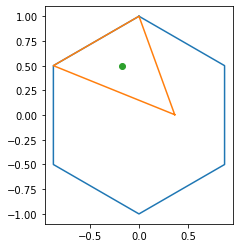

In [ ]:
# Generate a Regular Hexagon
regular_hex = RP((0,0),6,1)

# Get the path of the hexagon generated above.
path = regular_hex.get_path()

# Get the list of path vertices.
vertices = path.vertices

# Get x and y values from vertices.
xs, ys = zip(*vertices) 

# Pair adjacent vertices anti-clockwise.
possible_adj_pairs = [(i, j) for i, j in zip(vertices[:-1], vertices[1:])]

# Get random pair of adjacent vertices
get_adj_pair = random.choice(possible_adj_pairs)

# Generate a random value of P and check if it lies within the hexagon
hex_has_point = False
while hex_has_point == False:
  P_size = (1, 2)
  P = np.random.uniform(-1, 1, P_size) # for efficiency limit generated values to xlim,ylim
  hex_has_point = path.contains_points(P)

# Create triangle T based on point P and random pair of adjacent vertices
T = [P[0],get_adj_pair[0],get_adj_pair[1],P[0]]
tri_xs, tri_ys = zip(*T)

# Compute centroid of triangle T
x_cent = (T[0][0] + T[1][0] + T[2][0])/3
y_cent = (T[0][1] + T[1][1] + T[2][1])/3
centroid = np.array([x_cent,y_cent])

# Generate hexgon showing triangle T and its centroid.
plt.figure()
plt.plot(xs,ys)
plt.plot(tri_xs, tri_ys)
plt.plot(x_cent, y_cent , marker='o')
plt.axis('scaled')
plt.show()

### Looping 



> On the next step, the main objective is to add a loop and also to save centroid for every iteration and use as the next P. Getting the last item of the list will assure that we are always getting the lattest centroid point as our P since we are using append to save it. 
However for the first P the list is going to be empty and we need to generate P at random, so we need to separate these logic with **If Statement** and repeat it with **For Loop**.

After making scatter plot of centroid list we get 'repeated hexagons forming a hexagon'. However this is still not a fucntion as required.



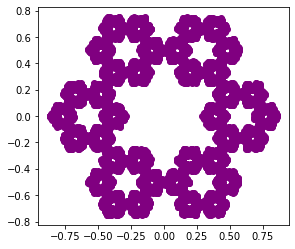

In [ ]:
# Create an empty list to save centroid of T in each circle of the loop.
Centroid_list = []

for _ in range(10000):
  if Centroid_list == []:
    # Generate a random value of P and check if it lies within the hexagon.
    hex_has_P = False
    while hex_has_P == False:
      P_size = (1, 2)
      P = np.random.uniform(-1, 1, P_size)
      hex_has_P = path.contains_points(P)
    # Create Triangle T
    get_adj_pair = random.choice(possible_adj_pairs)
    T = [P[0],get_adj_pair[0],get_adj_pair[1],P[0]]
    x_cent = (T[0][0] + T[1][0] + T[2][0])/3
    y_cent = (T[0][1] + T[1][1] + T[2][1])/3
    # Compute centriod
    centroid = np.array([x_cent,y_cent])
    # Save the centroid
    Centroid_list.append(centroid)
  else:
    # Get P as the last value of Centroid list.
    P = Centroid_list[-1]
    # Create Triangle T
    get_adj_pair = random.choice(possible_adj_pairs)
    T = [P,get_adj_pair[0],get_adj_pair[1],P]
    # Compute centriod
    x_cent = (T[0][0] + T[1][0] + T[2][0])/3
    y_cent = (T[0][1] + T[1][1] + T[2][1])/3
    centroid = np.array([x_cent,y_cent])
    # Save the centroid
    Centroid_list.append(centroid)

# Get x and y centroid list
x, y = zip(*Centroid_list)
plt.scatter(x, y, color='purple')
plt.axis('scaled') # format the shape and remove excess white space
plt.show()

### Final Function



> Lastly, using the code produced previously everything is put together as a fuction. For reusability, the function take number of sides of a regular polygon, color and number of iterations as parameters. By default the function will return a hexagon as required. However default parameters can be overridden to produce any regular polygon as shown below.



In [ ]:
def unexpected_plots(num_vertices=6, color='purple', itr=10000):

  """ Produce Unexpected Plots """

  # Generate a Regular Hexagon
  regular_poly = RP((0,0),num_vertices,1)
  # Get the path of the hexagon generated above.
  path = regular_poly.get_path()
  # Get the list of path vertices.
  vertices = path.vertices

  # Get x and y values from vertices.
  xs, ys = zip(*vertices) 

  # Pair adjacent vertices anti-clockwise.
  possible_adj_pairs = [(i, j) for i, j in zip(vertices[:-1], vertices[1:])]

  # Create an empty list to save centroid of T in each circle of the loop.
  Centroid_list = []

  for _ in range(itr):
    if Centroid_list == []:
      # Generate a random value of P and check if it lies within the hexagon.
      poly_has_P = False
      while poly_has_P == False:
        P_size = (1, 2)
        P = np.random.uniform(-1, 1, P_size)
        poly_has_P = path.contains_points(P)
      # Create Triangle T
      get_adj_pair = random.choice(possible_adj_pairs)
      T = [P[0],get_adj_pair[0],get_adj_pair[1],P[0]]
      x_cent = (T[0][0] + T[1][0] + T[2][0])/3
      y_cent = (T[0][1] + T[1][1] + T[2][1])/3
      # Compute centriod
      centroid = np.array([x_cent,y_cent])
      # Save the centroid
      Centroid_list.append(centroid)
    else:
      # Get P as the last value of Centroid list.
      P = Centroid_list[-1]
      # Create Triangle T
      get_adj_pair = random.choice(possible_adj_pairs)
      T = [P,get_adj_pair[0],get_adj_pair[1],P]
      # Compute centriod
      x_cent = (T[0][0] + T[1][0] + T[2][0])/3
      y_cent = (T[0][1] + T[1][1] + T[2][1])/3
      centroid = np.array([x_cent,y_cent])
      # Save the centroid
      Centroid_list.append(centroid)

  # Get x and y centroid list
  x, y = zip(*Centroid_list)
  plt.scatter(x, y, color=color)
  plt.axis('equal') # format the shape
  plt.show()  

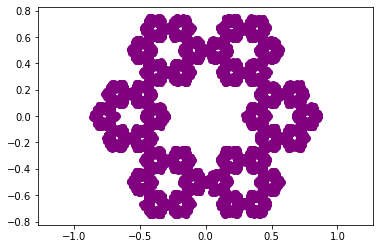

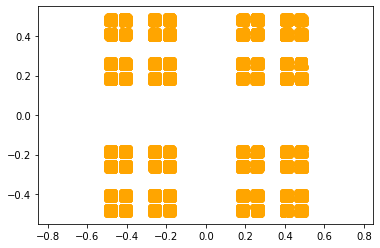

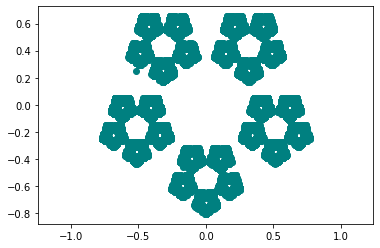

In [ ]:
# Produce hexagon based on default parameters
hexagon = unexpected_plots()
# Produce a square
square = unexpected_plots(4,'orange')
# Produce a pentagon
pentagon = unexpected_plots(5,'teal',itr=50000)

## **TASK 2: Datascience with Pandas and Movie Data**

For this task, the code below is very lean and speaks directly to each question as detailed in the [assignment doc](https://docs.google.com/document/d/1ZUltBJgPx2d3Y3QC44xoibZJFCpNo2mIR9KZkpnLdv8/edit?usp=sharing) with minimal flexibility.

### Coding Environment

In [ ]:
#Please uncomment the below commands if any of this libraries are not already installed

# !pip install --upgrade sklearn==1.0.1
# !pip install --upgrade scipy==1.4.1
# !pip install --upgrade torch==1.10.0+cu111

In [4]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



import torch
from torch import nn
from torch.autograd import Variable



### Data Extraction





> Download and add the dataset to an instance of this notebook from gdrive sharable link using id.





In [2]:
# download ratings data
!gdown --id "1pwup1x4k5BSvbQlqwMrr-exqn70PDuD7" 
# download akas data
!gdown --id "19OAEVaYWgud_mJhVcYfgA7vehUCtXfVY" 
# download basics data
!gdown --id "1Pc-aGqA6YBW5k37sGmDmnYoMgP0nw22i" 

Downloading...
From: https://drive.google.com/uc?id=1pwup1x4k5BSvbQlqwMrr-exqn70PDuD7
To: /content/title.ratings.tsv.gz
100% 4.32M/4.32M [00:00<00:00, 65.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=19OAEVaYWgud_mJhVcYfgA7vehUCtXfVY
To: /content/title.akas.tsv.gz
100% 54.1M/54.1M [00:01<00:00, 50.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Pc-aGqA6YBW5k37sGmDmnYoMgP0nw22i
To: /content/title.basics.tsv.gz
100% 96.1M/96.1M [00:01<00:00, 65.3MB/s]




> Load the dataset from google colab instance and create dataframes.



In [5]:
# load basics dataframe
url = '/content/title.basics.tsv.gz'
basics_df = pd.read_csv(url, sep='\t',  low_memory=False)
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
# load akas dataframe
url = '/content/title.akas.tsv.gz'
akas_df = pd.read_csv(url, sep='\t',  low_memory=False)
akas_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [7]:
# load ratings dataframe
url = '/content/title.ratings.tsv.gz'
ratings_df = pd.read_csv(url, sep='\t',  low_memory=False)
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713


### Data Pre-Processing



> Process the data as per the assignment doc to prepare it for Machine Learning. 



In [8]:
#drop duplicates
#ref-https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

basics_df = basics_df.drop_duplicates(keep=False, inplace=False)
akas_df = akas_df.drop_duplicates(keep=False, inplace=False)
ratings_df = ratings_df.drop_duplicates(keep=False,inplace=False)

In [9]:
#rename title_id in akas to tconst for consistancy when merging
akas_df.rename(columns={"titleId": "tconst"}, inplace=True)
akas_df.head(2)

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0


In [10]:
#merge
#ref-https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging
basics_akas_df = pd.merge(basics_df, akas_df, on="tconst")
master_df = pd.merge(basics_akas_df, ratings_df, on="tconst")
master_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,5.8,1422
1,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",2,Карменсита,RU,\N,\N,\N,0,5.8,1422
2,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",3,Carmencita,US,\N,\N,\N,0,5.8,1422
3,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",4,Carmencita,\N,\N,original,\N,1,5.8,1422
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",1,Le clown et ses chiens,\N,\N,original,\N,1,6.4,168


In [11]:
#Perform the outter join for comparison
outer_basics_akas_df = pd.merge(basics_df, akas_df, on="tconst", how="outer")
outer_master_df = pd.merge(basics_akas_df, ratings_df, on="tconst", how="outer")
outer_master_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,5.8,1422.0
1,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",2.0,Карменсита,RU,\N,\N,\N,0,5.8,1422.0
2,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",3.0,Carmencita,US,\N,\N,\N,0,5.8,1422.0
3,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",4.0,Carmencita,\N,\N,original,\N,1,5.8,1422.0
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",1.0,Le clown et ses chiens,\N,\N,original,\N,1,6.4,168.0


In [12]:
#Compare inner join and outer join.
inner_join_rows = len(master_df.index)
outer_join_rows = len(outer_master_df.index)
print("The resulting dataframe for inner join has {f} rows".format(f=inner_join_rows))
print("The resulting dataframe for outer join has {f} rows".format(f=outer_join_rows))

The resulting dataframe for inner join has 1686547 rows
The resulting dataframe for outer join has 3709341 rows


In [13]:
# Get unique titletypes
unique_titletype = pd.unique(master_df['titleType'])
#Count number of unique titletype's
len_unique_titletype = len(unique_titletype)
len_unique_titletype 

10



> For readability, the equivalent of the below statement in sql is:


```
SELECT *
FROM master_df
WHERE (region = 'US' OR language = 'en') AND titleType = movie;
```





In [14]:
# Create df_new 
df_new = master_df[((master_df['region'] == 'US') | (master_df['language'] == 'en')) & ((master_df['titleType']== 'movie') | (master_df['titleType']== 'tvMovie'))]
df_new.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
51,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,3,Miss Jerry,US,\N,\N,\N,0,5.5,70
574,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",1,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0,5.2,266
1446,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,4,Hamlet,US,\N,\N,\N,0,3.1,10
1520,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",1,The Fairylogue and Radio-Plays,US,\N,\N,\N,0,5.9,26
1797,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama,2,"Hamlet, Prince of Denmark",US,\N,\N,\N,0,5.2,16


In [15]:
pd.options.mode.chained_assignment = None
# Create function to compute log base 10 based on numVotes

def get_log10(row):
    '''Get logarithm base 10'''
    result = math.log10(row.numVotes)
    return result


# Apply the function the current df to add log10Votes column
df_new['log10Votes'] = df_new.apply(lambda row: get_log10(row), axis=1)
df_new.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes,log10Votes
51,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,3,Miss Jerry,US,\N,\N,\N,0,5.5,70,1.845098
574,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",1,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0,5.2,266,2.424882
1446,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,4,Hamlet,US,\N,\N,\N,0,3.1,10,1.000000
1520,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",1,The Fairylogue and Radio-Plays,US,\N,\N,\N,0,5.9,26,1.414973
1797,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama,2,"Hamlet, Prince of Denmark",US,\N,\N,\N,0,5.2,16,1.204120


In [16]:
# Lower the case of all text in the 'genres' column. 
df_new['genres'] = df_new['genres'].str.lower()

In [17]:
# reset index
df_new.reset_index(inplace=True, drop=True)
df_new.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes,log10Votes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,romance,3,Miss Jerry,US,\N,\N,\N,0,5.5,70,1.845098
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"documentary,news,sport",1,The Corbett-Fitzsimmons Fight,US,\N,\N,\N,0,5.2,266,2.424882
2,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,drama,4,Hamlet,US,\N,\N,\N,0,3.1,10,1.000000


In [18]:
# top 10 highest genres by mean number of log10Votes grouped by genres

df_genres_by_log10Votes = pd.DataFrame(df_new.groupby(by='genres')['log10Votes'].mean()).reset_index()
df_genres_by_log10Votes.head(10)

,genres,log10Votes
0,\n,1.179218
1,action,1.683927
2,"action,adult",1.661781
3,"action,adult,comedy",1.931261
4,"action,adult,crime",1.302024
5,"action,adult,drama",1.176091
6,"action,adult,western",0.954243
7,"action,adventure",2.121668
8,"action,adventure,animation",3.216021
9,"action,adventure,biography",3.477888


In [19]:
# top 10 highest genres by mean number of averageRating grouped by genres
df_genres_by_averageRating = pd.DataFrame(df_new.groupby(by='genres')['averageRating'].mean()).reset_index()
df_genres_by_averageRating.head(10)

,genres,averageRating
0,\n,6.292729
1,action,5.575131
2,"action,adult",5.050000
3,"action,adult,comedy",4.760000
4,"action,adult,crime",5.075000
5,"action,adult,drama",5.900000
6,"action,adult,western",5.200000
7,"action,adventure",5.825798
8,"action,adventure,animation",6.684823
9,"action,adventure,biography",6.493506


In [20]:
# averageRating vs log10Votes scatter plot
df_avgrating_scatter = pd.DataFrame(df_new.groupby(by='averageRating')['log10Votes'].mean()).reset_index()
df_avgrating_scatter.head()

,averageRating,log10Votes
0,1.0,1.477865
1,1.1,2.094683
2,1.2,2.195512
3,1.3,2.035512
4,1.4,1.901698


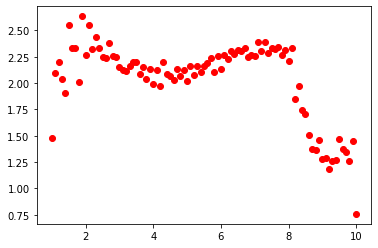

In [21]:
  plt.scatter(df_avgrating_scatter['averageRating'], df_avgrating_scatter['log10Votes'], color = 'red')
  plt.show() 

### ML Models

In [22]:
# make a copy  df_avgrating_scatter
main_df = df_avgrating_scatter.copy()

#### Using Sklearn

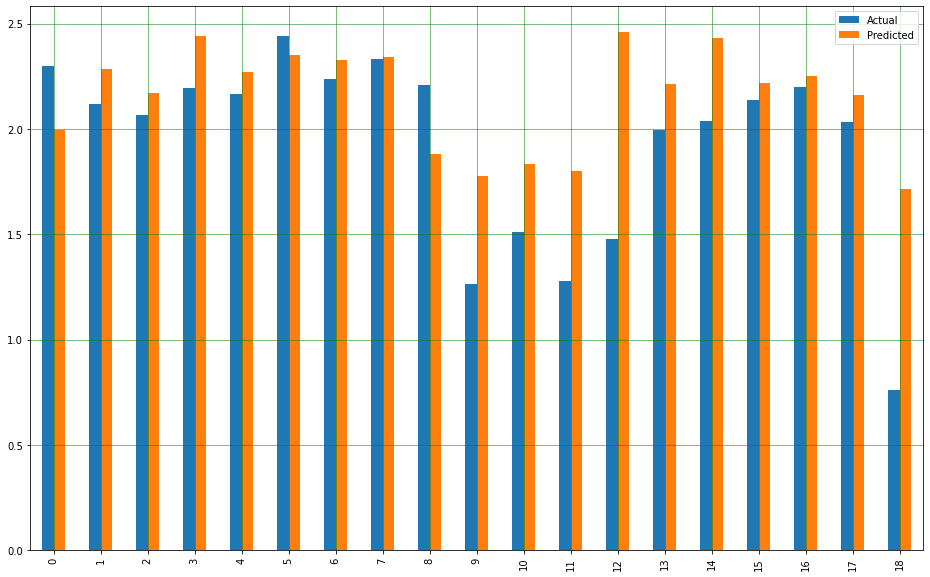

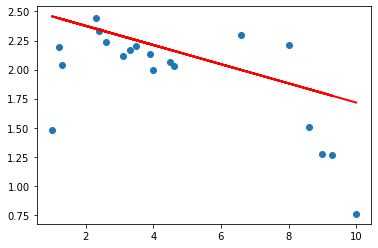

Intercept :  2.5413862338884905
Slope :  [-0.08247123]
R-Squared :  0.3592332405790153


In [24]:
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
X = np.array(main_df['averageRating']).reshape(-1, 1)
y = np.array(main_df['log10Votes']).reshape(-1, 1)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

# Regression instance
regr = LinearRegression()

# training the model
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test) # Making predictions on the test data
predic = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) # Comparison of actual output values for X_test with the predicted values

# Comparison of actual output values for X_test with the predicted values using a bar graph
df1 = predic.head(22)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print("\n")
# Scatter Plot
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred,color='red', linewidth=2)
plt.show()


print("Intercept : ", regr.intercept_[0])  #To retrieve the intercept.
print("Slope : ",regr.coef_[0]) #For retrieving the slope.
print("R-Squared : ",regr.score(X_train, y_train)) #To retrieve the R score on training data.

#### Using Scipy

In [25]:
from scipy import stats
# fit data into scipy model
scipy_model = stats.mstats.linregress(X_train,y_train)
print("Intercept : ", scipy_model.intercept)
print("Slope : ", scipy_model.slope)
print("R-Squared : ", scipy_model.rvalue**2)

Intercept :  2.5413862338884905
Slope :  -0.08247123489453358
R-Squared :  0.35923324057901507


#### Using Pytorch

In [26]:
import torch
from torch import nn
from torch.autograd import Variable

# X_values = np.array(main_df[['averageRating']], dtype=np.float32)
# y_values = np.array(main_df[['log10Votes']], dtype=np.float32)
X_train_torch = Variable(torch.from_numpy(X_train.reshape(-1, 1))).float()
y_train_torch = Variable(torch.from_numpy(y_train.reshape(-1, 1))).float()

# Custom Linear Regression Class

class LinearReg(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        
        # Inherit from parent
        super(LinearReg, self).__init__()
        self.linear = nn.Linear(input_size, output_size,  bias=True)
    
    # Prediction function
    def forward(self, x):
        pred = self.linear(x)
        return pred
    
torch_model = LinearReg(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(torch_model.parameters(), lr=0.002)

n_epoch = 1000
for epoch in range(n_epoch):
    # predict model with current regression parameters
    y_pred = torch_model(X_train_torch)
    # calculate loss function
    loss = criterion(y_pred, y_train_torch)
        
    # Backward to find the derivatives of the loss function with respect to regression parameters
    # nullify gradients and update the weights
    optimizer.zero_grad()
    loss.backward()
    # update with current step regression parameters 
    optimizer.step()
    print ('epoch [{}], Loss: {:.2f}'.format(epoch, loss.item()))

epoch [0], Loss: 2.64
epoch [1], Loss: 2.38
epoch [2], Loss: 2.21
epoch [3], Loss: 2.08
epoch [4], Loss: 1.99
epoch [5], Loss: 1.93
epoch [6], Loss: 1.88
epoch [7], Loss: 1.85
epoch [8], Loss: 1.82
epoch [9], Loss: 1.81
epoch [10], Loss: 1.79
epoch [11], Loss: 1.78
epoch [12], Loss: 1.77
epoch [13], Loss: 1.77
epoch [14], Loss: 1.76
epoch [15], Loss: 1.76
epoch [16], Loss: 1.76
epoch [17], Loss: 1.75
epoch [18], Loss: 1.75
epoch [19], Loss: 1.75
epoch [20], Loss: 1.75
epoch [21], Loss: 1.74
epoch [22], Loss: 1.74
epoch [23], Loss: 1.74
epoch [24], Loss: 1.74
epoch [25], Loss: 1.73
epoch [26], Loss: 1.73
epoch [27], Loss: 1.73
epoch [28], Loss: 1.73
epoch [29], Loss: 1.73
epoch [30], Loss: 1.72
epoch [31], Loss: 1.72
epoch [32], Loss: 1.72
epoch [33], Loss: 1.72
epoch [34], Loss: 1.72
epoch [35], Loss: 1.71
epoch [36], Loss: 1.71
epoch [37], Loss: 1.71
epoch [38], Loss: 1.71
epoch [39], Loss: 1.70
epoch [40], Loss: 1.70
epoch [41], Loss: 1.70
epoch [42], Loss: 1.70
epoch [43], Loss: 1.7

In [27]:
print("Parameters: ", list(torch_model.parameters()))

Parameters:  [Parameter containing:
tensor([[0.1710]], requires_grad=True), Parameter containing:
tensor([0.8204], requires_grad=True)]
